In [1]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
warnings.filterwarnings("ignore")

# API keys
import api_keys

# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = api_keys.consumer_key
consumer_secret = api_keys.consumer_secret
access_token = api_keys.access_token
access_token_secret = api_keys.access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

## Grab Tweets

In [3]:
# Create a generic dictionary for holding all tweet information
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

# Grab 100 tweets from each site (total 500)
for x in range(5):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [4]:
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,BREAKING: Federal appeals court rules against ...,Thu Nov 08 19:18:44 +0000 2018,0.0000,0.000,1.000,0.000
1,Fox News,Breaking News: Grand jury indicts captain of M...,Thu Nov 08 17:02:25 +0000 2018,-0.6124,0.115,0.615,0.269
2,Fox News,JUST IN: Police identify gunman who opened fir...,Thu Nov 08 15:14:45 +0000 2018,-0.7783,0.000,0.638,0.362
3,Fox News,JUST IN: Supreme Court Justice Ruth Bader Gins...,Thu Nov 08 14:22:51 +0000 2018,0.7906,0.389,0.611,0.000
4,Fox News,Sgt. Ron Helus was fatally shot when he respon...,Thu Nov 08 13:43:25 +0000 2018,-0.6369,0.000,0.833,0.167


In [5]:
# Count the total number of tweets
tweet_df.count()

tweet_source         500
tweet_text           500
tweet_date           500
tweet_vader_score    500
tweet_pos_score      500
tweet_neu_score      500
tweet_neg_score      500
dtype: int64

In [6]:
# Obtain the source names for reference
tweet_df["tweet_source"].unique()

array(['Fox News', 'CNN', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

In [7]:
# Convert dates (currently strings) into datetimes
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

# Sort the dataframe by date
tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,McDonald's customers’ $5M lawsuit over unwante...,2018-11-08 03:01:47+00:00,-0.4215,0.000,0.743,0.257
1,Fox News,Woman finds her diamond before proposal and 'r...,2018-11-08 03:04:00+00:00,-0.0772,0.170,0.638,0.191
2,Fox News,.@senatemajldr Mitch McConnell said Wednesday ...,2018-11-08 03:11:00+00:00,0.4939,0.158,0.842,0.000
3,Fox News,Surveillance video shows Michigan woman report...,2018-11-08 03:16:01+00:00,0.0000,0.000,1.000,0.000
4,Fox News,"Democrat Colin Allred, who unseated Rep. Pete ...",2018-11-08 03:23:00+00:00,0.0000,0.000,1.000,0.000


## Sentiment Scatter Plot

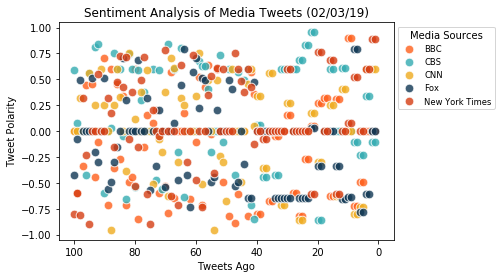

In [8]:
# Build scatter plot for tracking tweet polarity by tweet history
# Note how a few data munging tricks were used to obtain (-100 -> 0 tick marks)
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="white", linewidths=1, marker="o", color="#FE5F1B", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="white", linewidths=1, marker="o", color="#33ABB1", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="white", linewidths=1, marker="o", color="#EFAB1F", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="white", linewidths=1, marker="o", color="#103754", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="white", linewidths=1, marker="o", color="#D53D13", s=75,
            alpha=0.8, label="New York Times")

# Graph ticks and labels
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(False)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-ScatterPlot.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

# Scatter Plot Observations on Overall Tweets

There is a fairly even distribution of positive, negative, and neutral tweets from the five news sources used in this analysis. Fox news shows that it is skewed towards more negative tweets recently. Whereas, CBS has been tweeting using more positive language within their last 100 tweets. 

## Overall Sentiment Bar Graph

In [9]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity)

,tweet_vader_score
tweet_source,
BBC News (World),-0.114042
CBS News,0.172493
CNN,0.024669
Fox News,-0.116200
The New York Times,0.094894


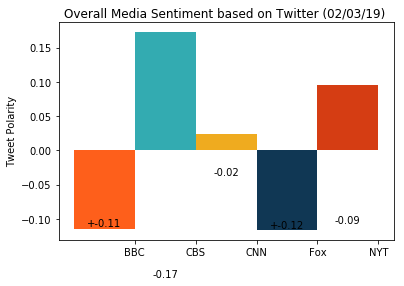

In [10]:
# Store all polarities in a tuple
tweets_polarity = (tweet_df_polarity["BBC News (World)"], 
                    tweet_df_polarity["CBS News"], 
                    tweet_df_polarity["CNN"], 
                    tweet_df_polarity["Fox News"],
                    tweet_df_polarity["The New York Times"])

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="#FE5F1B")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="#33ABB1")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="#EFAB1F")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='#103754')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='#D53D13')

# Generate labels for each news source
def autolabelpos(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '+%.2f' % float(height),
                ha='center', va='bottom')

def autolabelneg(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')
    
autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

# Orient widths, add labels, tick marks, etc. 
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)
ax.grid(False)

# Save Figure
file_name = str(time.strftime("%m-%d-%y")) + "-BarChart.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show Figure
fig.show()

# Bar Chart Observations on Combined Analysis of Tweets

This bar chart shows a clear picture of language sentiment analysis from the BBC, CBS, CNN, Fox, and New York Times. Overall, CBS has been the news source that has incorporated the most positive language in their last 100 tweets. The BBC and Fox news have both used the same amount of negative language in their last 100 tweets. CNN's last 100 tweets have remained mostly neutral in language sentiment.